# INTERMEDIATE IMPORTING DATA IN PYTHON 

# 1-) Importing Data From The Internet (İnternetteki veriyi içe aktarmak)

### --> Importing flat files from the web (Web'deki düz dosyaları içe aktarmak)

İnternette herhangi bir sitedeki verileri içe aktarmak için: 

+ Sitenin URL'sine gidip dosyaları indirebiliriz ancak bu bazı problemlere sebep olur. Bunlar: 

      -> İlk olarak kod ile yazılmadığı için reproducibility (yeniden üretilebilirlik) sorunu oluşturur.
      
      -> Başka bir veri bilimcisi iş akışını yeniden oluşturmak isterse bunu Python dışında yapmak zorunda kalacaktır.
      
      -> Scalable (ölçeklenebilir) değildir. 

+ urllib modulünü kullanabiliriz.

  -> Bu modül, Worl Wide Web (www) üzerinden veri almak için yüksek seviyeli bir arayüzdür.
  
  -> Özellikle urlopen() komutu, Python'daki gömülü işlev olan open()'a çok benzer. Tek farkı parametre olarak dosya adı yerine URL kabul eder.

--> Aşağıdaki örnekte; ilgili URL'yi, url değişkenine bir dize olarak atayacağız. Daha sonra url'nin içeriğini bir "winequality-red.csv" dosyasına yazmak için urlretrieve işlevini kullanacağız.

+ urlretrieve --> Veriyi, verilen url'den almak ve gerekli dosya dizinine depolamak için kullanılır.

  Parametreleri:
  
      urlstring -> Dosyaya yazılacak olan veririnin URL'si.
      
      filename -> Veriyi yazdıracağımız dosyanın adı. 

In [1]:
from urllib.request import urlretrieve

url = "https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"
urlretrieve(url, "winequality-red.csv")

('winequality-red.csv', <http.client.HTTPMessage at 0x1b0de00d040>)

--> Bu sefer aşağıdaki örnekte; Yukarıda "winequality-red.csv" dosyasına yazdırdığımız url içeriğini Pandas ile DataFrame olarak yazdıracağız.

In [2]:
from urllib.request import urlretrieve
import pandas as pd

url = "https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv"
urlretrieve(url, "winequality-red.csv")
df = pd.read_csv("winequality-red.csv", sep = ";")
print(df.head())

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

+ Sadece Pandas ile, yukarıdaki urlretieve() işlemini yapmadan, pd.read_csv() komutunda dosya adını girdiğimiz parametreye URL adını girerek de aynı işlemi yapabiliriz.

   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0            7.4              0.70         0.00             1.9      0.076   
1            7.8              0.88         0.00             2.6      0.098   
2            7.8              0.76         0.04             2.3      0.092   
3           11.2              0.28         0.56             1.9      0.075   
4            7.4              0.70         0.00             1.9      0.076   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                 11.0                  34.0   0.9978  3.51       0.56   
1                 25.0                  67.0   0.9968  3.20       0.68   
2                 15.0                  54.0   0.9970  3.26       0.65   
3                 17.0                  60.0   0.9980  3.16       0.58   
4                 11.0                  34.0   0.9978  3.51       0.56   

   alcohol  quality  
0      9.4        5  
1      9.8        5  
2      9.8        5 

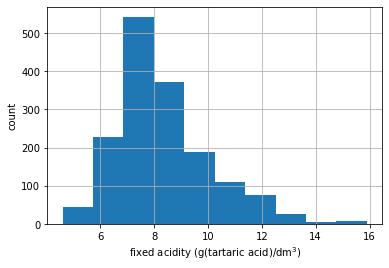

In [3]:
import matplotlib.pyplot as plt
import pandas as pd 

url = 'https://assets.datacamp.com/production/course_1606/datasets/winequality-red.csv'
df = pd.read_csv(url, sep = ";")
print(df.head())

df.iloc[:, 0].hist()
plt.xlabel('fixed acidity (g(tartaric acid)/dm$^3$)')
plt.ylabel('count')
plt.show()

### --> Importing non-flat files from the web 

--> Aşağıdaki örnekte world wide web'deki (www) bir excel dosyasını içe aktaracağız. Ancak şunu unutmamalıyız:

> pd.read_excel() komutunun çıktısı, key (anahtar) olarak sayfa adlarını ve value (karşılık gelen değerler) olarak DataFrame'leri içeren bir Python sözlüğüdür.

In [4]:
import pandas as pd 

url = 'https://assets.datacamp.com/course/importing_data_into_r/latitude.xls'
xls = pd.read_excel(url, sheet_name = None)
print(xls.keys())
print(xls["1700"].head())

dict_keys(['1700', '1900'])
                 country       1700
0            Afghanistan  34.565000
1  Akrotiri and Dhekelia  34.616667
2                Albania  41.312000
3                Algeria  36.720000
4         American Samoa -14.307000


### --> HTTP requests to import files from the web 

URL (uniform resoucre locator (tekdüzen kaynak bulucu)): Web kaynaklarına yapılan referanslardır. Ancak FTP (file transfer protocol (dosya aktarım protokolleri)) ve veri tabanı erişimi gibi başka şeylere de atıfta bulunabilirler. 

Bu başlıkta odaklanacağımız URL'ler, web adresi veya web sitelerin konumları olan URL'ler olacak. Bu tip URL'ler 2 bölümden oluşur: 

+ Protocol identifier (protokol tanımlayıcısı) -> "http:" kısmı 

+ Resource name (kaynak adı) -> "xxxx.com" kısmı

HTTP Kısmı: 

+ HyperText Transfer Protocol (Üstmetin transfer protokolü)
+ Worl wide web (www) için veri iletişiminin temelidir.
+ Aslında bir web sitesine gittiğimizde, bir sunucuya HTTP isteği göndermiş oluyoruz. Bu istek en yaygın HTTP istek türü olan GET isteği olarak bilinir. Biz urlretieve() komutunu kullanırken aslında bir GET isteği gerçekleştiriyoruz.  

--> Aşağıdaki örnekte:

1-) urllib paketinin, request modülündeki urlopen ve Request fonksiyonlarını; dosyaları açmak ve okumak için import edeceğiz.

2-) Request() işlevini kullanarak yukarıda bahsettiğimiz GET isteğini gerçekleştireceğiz.

3-) urlopen() işlevini kullanarak karşıdan gelen yanıtı "response" değişkenine kaydedeceğiz. 

Buraya kadar olan kısımda, Request() işlevini kullanarak veri çekmek istediğimiz HTTP'ye bir GET isteği yolladık. Yolladığımız GET isteğinin karşılığı olarak bize veri geldi ve biz de o veriyi urlopen() ile aldık. Buraya kadar olan kısmın sonucunda elimizde HTTPResponse nesnesi olur.  

4-) "html" adlı bir değişkene dosyanın okunmuş halini atayacağız ve daha sonra dosyayı kapatacağız. 

In [5]:
from urllib.request import urlopen, Request

url = "https://www.wikipedia.org/"
request = Request(url)
response = urlopen(request)
html = response.read()
response.close()

In [6]:
print(type(response))

<class 'http.client.HTTPResponse'>


In [7]:
print(html)

b'<!DOCTYPE html>\n<html lang="en" class="no-js">\n<head>\n<meta charset="utf-8">\n<title>Wikipedia</title>\n<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">\n<script>\ndocument.documentElement.className = document.documentElement.className.replace( /(^|\\s)no-js(\\s|$)/, "$1js-enabled$2" );\n</script>\n<meta name="viewport" content="initial-scale=1,user-scalable=yes">\n<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">\n<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">\n<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">\n<style>\n.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-e99844f6.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister

Yukarıda yaptıklarımızı "requests" adlı API sağlayan bir istek (request) paketiyle yapacağız.

+ requests paketi:

      -> Talepler, yukarıdaki gibi manuel işçilik gerektirmeden HTTP istekleri göndermemize olanak tanır. 

--> Aşağıdaki örnekte de requests paketinin requests.get() işlevini kullanarak hem GET isteğini gerçekleştirmiş hem de gelen veriyi "r" değişkenine atamış olacağız. xxx.text() işlevini kullanarak da dosyayı hem okuyup hem de kapatmış olacağız.

In [8]:
import requests

url = "https://www.wikipedia.org/"
r = requests.get(url)
text = r.text
print(text)

<!DOCTYPE html>
<html lang="en" class="no-js">
<head>
<meta charset="utf-8">
<title>Wikipedia</title>
<meta name="description" content="Wikipedia is a free online encyclopedia, created and edited by volunteers around the world and hosted by the Wikimedia Foundation.">
<script>
document.documentElement.className = document.documentElement.className.replace( /(^|\s)no-js(\s|$)/, "$1js-enabled$2" );
</script>
<meta name="viewport" content="initial-scale=1,user-scalable=yes">
<link rel="apple-touch-icon" href="/static/apple-touch/wikipedia.png">
<link rel="shortcut icon" href="/static/favicon/wikipedia.ico">
<link rel="license" href="//creativecommons.org/licenses/by-sa/3.0/">
<style>
.sprite{background-image:linear-gradient(transparent,transparent),url(portal/wikipedia.org/assets/img/sprite-e99844f6.svg);background-repeat:no-repeat;display:inline-block;vertical-align:middle}.svg-Commons-logo_sister{background-position:0 0;width:47px;height:47px}.svg-MediaWiki-logo_sister{background-positi

### --> Scraping the web in Python 

HTML (HyperText Markup Language (Hiper metin işaretleme dili)), hem yapılandırılmış (structured) hem de yapılandırılmamış (unstructured) verilerin bir karışımıdır.

+ Structured (Yapılandırılmış) Data:
  
      -> Önceden tanımlanmış veri modeline sahiptir.
      
      ya da
      
      -> Tanımlanmış bir şekilde düzenlenmiştir.
      
+ Unstructured (Yapılandırılmamış) Data:

      -> Yukarıda verilen özelliklerden herhangi birine sahip değildir.

Genel olarak dünya çapında web'den kazıdığımız HTML'yi dönüştürmek ve yararlı verilere çevirmek için onu ayrıştırmamız ve structured verileri oradan çıkarmamız gerekir. Bunu da BeautifulSoup adlı bir Python paketiyle yapabiliriz. Bu paket, yukarıda elde ettiğimiz karmakarışık sonuçları temizlemede kullanılır.   

--> Aşağıdaki örnekte, Yukarıda yaptığımız alıştırmaların sonucunda elde edilen karmaşık verileri "BeautifulSoup" kullanarak temizleyeceğiz. Yine aynı şekilde "requests" paketinide "requests.get()" işlevini kullanarak GET isteğini gerçekleştirip gelen veriyi "r" değişkenine atamış olacağız. Ardından "r.text()" işlevi ile gelen veri dosyasını okuyup kapatmış olacağız. Ardından son olarak "bs4(BeautifulSoup)" paketindeki "BeatifulSoup" işlevini kullanarak bir BeautifulSoup nesnesi oluşturacağız ve bu paketin içindeki "xxx.prettify()" işlevi ile veriyi temizlemiş olacağız.    

In [9]:
from bs4 import BeautifulSoup
import requests

url = "https://www.crummy.com/software/BeautifulSoup/"
r = requests.get(url)
html_doc = r.text
soup = BeautifulSoup(html_doc)
print(soup.prettify())

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
 <head>
  <meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
  <title>
   Beautiful Soup: We called him Tortoise because he taught us.
  </title>
  <link href="mailto:leonardr@segfault.org" rev="made"/>
  <link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
  <meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
  <meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
  <meta content="Leonard Richardson" name="author"/>
 </head>
 <body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
  <style>
   #tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
  </style>
  <img align="right" src="1

In [10]:
print(soup)

<!DOCTYPE HTML PUBLIC "-//W3C//DTD HTML 4.0 Transitional//EN" "http://www.w3.org/TR/REC-html40/transitional.dtd">
<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<title>Beautiful Soup: We called him Tortoise because he taught us.</title>
<link href="mailto:leonardr@segfault.org" rev="made"/>
<link href="/nb/themes/Default/nb.css" rel="stylesheet" type="text/css"/>
<meta content="Beautiful Soup: a library designed for screen-scraping HTML and XML." name="Description"/>
<meta content="Markov Approximation 1.4 (module: leonardr)" name="generator"/>
<meta content="Leonard Richardson" name="author"/>
</head>
<body alink="red" bgcolor="white" link="blue" text="black" vlink="660066">
<style>
#tidelift { }

#tidelift a {
 border: 1px solid #666666;
 margin-left: auto;
 padding: 10px;
 text-decoration: none;
}

#tidelift .cta {
 background: url("tidelift.svg") no-repeat;
 padding-left: 30px;
}
</style>
<img align="right" src="10.1.jpg" width="250"/><br/>
<p>[ 

In [11]:
print(soup.title) # Metnin başlığını verir.

<title>Beautiful Soup: We called him Tortoise because he taught us.</title>


In [12]:
print(soup.get_text()) # Metni verir.




Beautiful Soup: We called him Tortoise because he taught us.









[ Download | Documentation | Hall of Fame | For enterprise | Source | Changelog | Discussion group  | Zine ]

Beautiful Soup

You didn't write that awful page. You're just trying to get some
data out of it. Beautiful Soup is here to help. Since 2004, it's been
saving programmers hours or days of work on quick-turnaround
screen scraping projects.
Beautiful Soup is a Python library designed for quick turnaround
projects like screen-scraping. Three features make it powerful:


Beautiful Soup provides a few simple methods and Pythonic idioms
for navigating, searching, and modifying a parse tree: a toolkit for
dissecting a document and extracting what you need. It doesn't take
much code to write an application

Beautiful Soup automatically converts incoming documents to
Unicode and outgoing documents to UTF-8. You don't have to think
about encodings, unless the document doesn't specify an encoding and
Beautiful Soup ca

In [13]:
for link in soup.find_all():
    print(link.get("href"))

None
None
None
None
mailto:leonardr@segfault.org
/nb/themes/Default/nb.css
None
None
None
None
None
None
None
None
#Download
bs4/doc/
#HallOfFame
enterprise.html
https://code.launchpad.net/beautifulsoup
https://bazaar.launchpad.net/%7Eleonardr/beautifulsoup/bs4/view/head:/CHANGELOG
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
zine/
None
bs4/download/
None
None
None
None
None
None
None
http://lxml.de/
http://code.google.com/p/html5lib/
None
None
None
None
bs4/doc/
None
None
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=enterprise
None
None
https://groups.google.com/forum/?fromgroups#!forum/beautifulsoup
https://bugs.launchpad.net/beautifulsoup/
https://tidelift.com/security
None
https://tidelift.com/subscription/pkg/pypi-beautifulsoup4?utm_source=pypi-beautifulsoup4&utm_medium=referral&utm_campaign=website
None
zine/
None
None
None
None
bs4/download/
None
None
None
None
None
None
None
None
No

# 2-) Introduction to APIs and JSONs

APIs (Application Programming Interface (Uygulama Programlama Arayüzü)):

+ Yazılım uygulamaları oluşturmak ve bunlarla iletişim kurmak için bir dizi protokol ve rutindir.

API'lar aracılığıyla veri aktarmının standart formu; JSON dosyalarıdır. 

JSON (JavaScript Object Notation (JavaScript Nesne Notasyonu)):

+ Flash veya Java'ya dayanması gerekmeyen, "gerçek zamanlı sunucudan-tarayıcıya" iletişim için artan ihtiyaçtan ortaya çıkan bir dosya biçimidir.
+ İnsanlar tarafından okunabilir bir dosya biçimidir. 
+ Virgülle ayrılmış ad-değer çiftlerinden oluşur. Bu yüzden JSON dosyalarını Python'a yüklerken dictionary veri tipi şeklinde yüklemek daha mantıklı olacaktır. 

--> Aşağıdaki örnekte JSON dosyasını Python'a yükleyeceğiz. "json" paketini içe aktardıktan sonra dosyaya "open()" işlevi ile bir bağlantı açacağız. Ardından JSON dosyasını yüklemek için "json.load(xxx)" işlevini kullanacağız.

In [14]:
"""
import json

with open("snakes.json", "r") as json_file:
    json_data = json.load(json_file)
    
type(json_data) --> Çıktısı : dict

"""

'\nimport json\n\nwith open("snakes.json", "r") as json_file:\n    json_data = json.load(json_file)\n    \ntype(json_data) --> Çıktısı : dict\n\n'

--> Aşağıdaki örnekte, OMDB API'sinden veri alacağız. İlk önce "requests" paketini içe aktarıp "r" adlı değişkene, "requests.get(xxx)" işlevi ile internetten çekeceğimiz veriyi atayacağız. "print(r.text)" ile verinin içindeki metni yazdıracağız. "json_data" adlı değişkene, "r.json() (r değişkenine atadığımız verinin JSON dosyasına dönüştürülmüş hali)" atayacağız. JSON dosyası bir dictionary formatında olduğu için for döngüsü ile "key : value" şeklinde verileri yazdıracağız.  

In [15]:
import requests 

url = "http://www.omdbapi.com/?apikey=72bc447a&t=the+social+network" 
r = requests.get(url)
print(r.text) 
print("\t\t")
json_data = r.json()
for k in json_data.keys():
    print(f"{k} : {json_data[k]}")

{"Title":"The Social Network","Year":"2010","Rated":"PG-13","Released":"01 Oct 2010","Runtime":"120 min","Genre":"Biography, Drama","Director":"David Fincher","Writer":"Aaron Sorkin, Ben Mezrich","Actors":"Jesse Eisenberg, Andrew Garfield, Justin Timberlake","Plot":"As Harvard student Mark Zuckerberg creates the social networking site that would become known as Facebook, he is sued by the twins who claimed he stole their idea, and by the co-founder who was later squeezed out of the business.","Language":"English, French","Country":"United States","Awards":"Won 3 Oscars. 173 wins & 186 nominations total","Poster":"https://m.media-amazon.com/images/M/MV5BOGUyZDUxZjEtMmIzMC00MzlmLTg4MGItZWJmMzBhZjE0Mjc1XkEyXkFqcGdeQXVyMTMxODk2OTU@._V1_SX300.jpg","Ratings":[{"Source":"Internet Movie Database","Value":"7.8/10"},{"Source":"Rotten Tomatoes","Value":"96%"},{"Source":"Metacritic","Value":"95/100"}],"Metascore":"95","imdbRating":"7.8","imdbVotes":"702,485","imdbID":"tt1285016","Type":"movie","DV